# Anime Recommendation System

![istri_gw_bang](https://github.com/Mayumiwandi/My-Learn/assets/84662810/0c0453b2-e155-4219-b8fb-dd3d963f1718)

## Data Collection

Import Library

In [1]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

In [2]:
!pip install -q kaggle

In [ ]:
files.upload()

In [4]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

Anime Dataset 2023 [Unduh Datasets](https://www.kaggle.com/datasets/dbdmobile/myanimelist-dataset/data?select=anime-filtered.csv)

In [5]:
!kaggle datasets download -d dbdmobile/myanimelist-dataset

 99% 1.79G/1.80G [00:29<00:00, 87.5MB/s]
100% 1.80G/1.80G [00:29<00:00, 64.8MB/s]


In [6]:
!unzip /content/myanimelist-dataset.zip

Archive:  /content/myanimelist-dataset.zip
  inflating: anime-dataset-2023.csv  
  inflating: anime-filtered.csv      
  inflating: final_animedataset.csv  
  inflating: user-filtered.csv       
  inflating: users-details-2023.csv  
  inflating: users-score-2023.csv    


Dapat kita lihat setelah kita Exstrak file zip, terdapat banyak file csv, tetapi pada kasus ini kita hanya menggunakan file `anime-filtered.csv`

In [7]:
df = pd.read_csv('/content/anime-filtered.csv')

## Data Understanding

In [8]:
df.head()

,anime_id,Name,Score,Genres,English name,Japanese name,sypnopsis,Type,Episodes,Aired,...,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,"In the year 2071, humanity has colonized sever...",TV,26,"Apr 3, 1998 to Apr 24, 1999",...,24 min. per ep.,R - 17+ (violence & profanity),28.0,39,1251960,61971,105808,718161,71513,26678
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,"other day, another bounty—such is the life of ...",Movie,1,"Sep 1, 2001",...,1 hr. 55 min.,R - 17+ (violence & profanity),159.0,518,273145,1174,4143,208333,1935,770
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,"Vash the Stampede is the man with a $$60,000,0...",TV,26,"Apr 1, 1998 to Sep 30, 1998",...,24 min. per ep.,PG-13 - Teens 13 or older,266.0,201,558913,12944,29113,343492,25465,13925
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),ches are individuals with special powers like ...,TV,26,"Jul 2, 2002 to Dec 24, 2002",...,25 min. per ep.,PG-13 - Teens 13 or older,2481.0,1467,94683,587,4300,46165,5121,5378
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,It is the dark century and the people are suff...,TV,52,"Sep 30, 2004 to Sep 29, 2005",...,23 min. per ep.,PG - Children,3710.0,4369,13224,18,642,7314,766,1108


In [9]:
print(f'Terdapat  {df.shape[0]} Table dan {df.shape[1]} columns.')

Terdapat  14952 Table dan 25 columns.


In [10]:
for i, (nama_kolom, jumlah) in enumerate(df.count().items(), 1):
    print(f"Kolom {i:2d}: {nama_kolom} - Berjumlah:  {jumlah}")


Kolom  1: anime_id - Berjumlah:  14952
Kolom  2: Name - Berjumlah:  14952
Kolom  3: Score - Berjumlah:  14952
Kolom  4: Genres - Berjumlah:  14952
Kolom  5: English name - Berjumlah:  14952
Kolom  6: Japanese name - Berjumlah:  14952
Kolom  7: sypnopsis - Berjumlah:  13602
Kolom  8: Type - Berjumlah:  14952
Kolom  9: Episodes - Berjumlah:  14952
Kolom 10: Aired - Berjumlah:  14952
Kolom 11: Premiered - Berjumlah:  14952
Kolom 12: Producers - Berjumlah:  14952
Kolom 13: Licensors - Berjumlah:  14952
Kolom 14: Studios - Berjumlah:  14952
Kolom 15: Source - Berjumlah:  14952
Kolom 16: Duration - Berjumlah:  14952
Kolom 17: Rating - Berjumlah:  14952
Kolom 18: Ranked - Berjumlah:  13231
Kolom 19: Popularity - Berjumlah:  14952
Kolom 20: Members - Berjumlah:  14952
Kolom 21: Favorites - Berjumlah:  14952
Kolom 22: Watching - Berjumlah:  14952
Kolom 23: Completed - Berjumlah:  14952
Kolom 24: On-Hold - Berjumlah:  14952
Kolom 25: Dropped - Berjumlah:  14952


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14952 entries, 0 to 14951
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   anime_id       14952 non-null  int64  
 1   Name           14952 non-null  object 
 2   Score          14952 non-null  float64
 3   Genres         14952 non-null  object 
 4   English name   14952 non-null  object 
 5   Japanese name  14952 non-null  object 
 6   sypnopsis      13602 non-null  object 
 7   Type           14952 non-null  object 
 8   Episodes       14952 non-null  object 
 9   Aired          14952 non-null  object 
 10  Premiered      14952 non-null  object 
 11  Producers      14952 non-null  object 
 12  Licensors      14952 non-null  object 
 13  Studios        14952 non-null  object 
 14  Source         14952 non-null  object 
 15  Duration       14952 non-null  object 
 16  Rating         14952 non-null  object 
 17  Ranked         13231 non-null  float64
 18  Popula

Dari output yang diberikan, dapat disimpulkan bahwa:

Terdapat total _25_ kolom dalam dataframe.  

- Dari _25_ kolom tersebut, terdapat _15_ kolom dengan tipe data `object`, yang kemungkinan besar merupakan fitur kategoris. Kolom-kolom tersebut adalah: *_Name, Genres, English name, Japanese name, sypnopsis, Type, Episodes, Aired, Premiered, Producers, Licensors, Studios, Source, Duration, dan Rating._*  

- Selanjutnya, terdapat _2_ kolom dengan tipe data `float64`, yang kemungkinan merupakan fitur numerik. Kolom-kolom tersebut adalah *_Score dan Ranked_*.  

- Ada _8_ kolom dengan tipe data `int64`, yang mungkin juga merupakan fitur numerik. Kolom-kolom ini adalah: *_anime_id, Popularity, Members, Favorites, Watching, Completed, On-Hold, dan Dropped_*.


# Tanda
Pada proyek ini, meskipun dataset menyediakan berbagai fitur, namun hanya tiga di antaranya yang akan dimanfaatkan untuk membangun model sistem rekomendasi yang sederhana, yaitu `Name`, `Score`, `Genres`,`Type`, dan `Studios`. Meskipun fitur-fitur lainnya mungkin memiliki nilai tambah untuk membangun model yang lebih kompleks, untuk keperluan proyek ini, hanya fitur-fitur tersebut yang akan difokuskan.

Dalam pembuatan model menggunakan _Content Based Filtering_, data yang diperlukan adalah nama anime `Name` dan Genre anime`Genres`. Sementara itu, untuk _Collaborative Filtering_, data yang diperlukan adalah nama anime `Name` dan Score yang diberikan pengguna `Score`.

In [12]:
df.duplicated().sum()

0

Tidak terdapat data duplikat

In [13]:
df.isnull().sum()

anime_id            0
Name                0
Score               0
Genres              0
English name        0
Japanese name       0
sypnopsis        1350
Type                0
Episodes            0
Aired               0
Premiered           0
Producers           0
Licensors           0
Studios             0
Source              0
Duration            0
Rating              0
Ranked           1721
Popularity          0
Members             0
Favorites           0
Watching            0
Completed           0
On-Hold             0
Dropped             0
dtype: int64

## Exploratory Data Analysis

### Deskripsi Variabel

In [14]:
df.columns

Index(['anime_id', 'Name', 'Score', 'Genres', 'English name', 'Japanese name',
       'sypnopsis', 'Type', 'Episodes', 'Aired', 'Premiered', 'Producers',
       'Licensors', 'Studios', 'Source', 'Duration', 'Rating', 'Ranked',
       'Popularity', 'Members', 'Favorites', 'Watching', 'Completed',
       'On-Hold', 'Dropped'],
      dtype='object')

**Penjelasan Kolom Dataframe**

Kolom datasets anime memiliki informasi berikut:

* **`anime_id`:** ID unik untuk setiap anime (angka atau kode pengenal).
* **`Name`:** Judul anime dalam bahasa aslinya.
* **`Score`:** Skor atau rating yang diberikan kepada anime.
* **`Genres`:** Genre anime, dipisahkan dengan koma (misalnya, Aksi, Komedi, Fantasi).
* **`English name`:** Judul anime dalam bahasa Inggris (jika tersedia).
* **`Japanese name`:** Judul anime dalam bahasa Jepang (jika tersedia).
* **`Synopsis`:** Deskripsi singkat atau ringkasan plot anime.
* **`Type`:** Jenis anime (misalnya, TV Series, Movie, OVA, dll.).
* **`Episodes`:** Jumlah episode dalam anime.
* **`Aired`:** Tanggal penayangan anime.
* **`Premiered`:** Musim dan tahun penayangan perdana anime.
* **`Producers`:** Perusahaan produksi atau produser anime.
* **`Licensors`:** Pihak yang memiliki lisensi anime (misalnya, platform streaming).
* **`Studios`:** Studio animasi yang mengerjakan anime.
* **`Source`:** Sumber materi anime (misalnya, manga, light novel, original).
* **`Duration`:** Durasi setiap episode anime.
* **`Rating`:** Batasan usia untuk menonton anime.
* **`Ranked`:** Peringkat anime berdasarkan popularitas atau kriteria lain.
* **`Popularity`:** Peringkat popularitas anime.
* **`Members`:** Jumlah anggota yang telah menambahkan anime ke daftar mereka di platform.
* **`Favorites`:** Jumlah pengguna yang menandai anime sebagai favorit.
* **`Watching`:** Jumlah anime yang sedang ditonton oleh pengguna.
* **`Completed`:** Jumlah anime yang telah selesai ditonton oleh pengguna.
* **`On Hold`:** Jumlah anime yang ditunda oleh pengguna.
* **`Dropped`:** Jumlah anime yang dihentikan oleh pengguna.


### Visualisasi

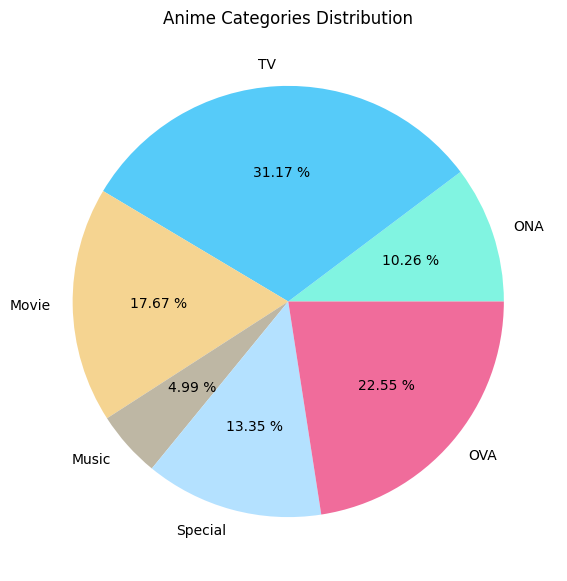

In [15]:
ona = df.loc[df['Type'] == 'ONA'].count()[0]
tv = df.loc[df['Type'] == 'TV'].count()[0]
movie = df.loc[df['Type'] == 'Movie'].count()[0]
music = df.loc[df['Type'] == 'Music'].count()[0]
special = df.loc[df['Type'] == 'Special'].count()[0]
ova = df.loc[df['Type'] == 'OVA'].count()[0]

labels = ['ONA', 'TV', 'Movie', 'Music', 'Special', 'OVA']
colors = ['#81F4E1', '#56CBF9', '#F5D491', '#BEB7A4', '#B4E1FF', '#F06C9B']

plt.figure(figsize = (10,7))
plt.title('Anime Categories Distribution')
plt.pie([ona, tv, movie, music, special, ova],
        labels = labels,
        colors = colors,
        autopct = '%.2f %%'
        )

plt.show()

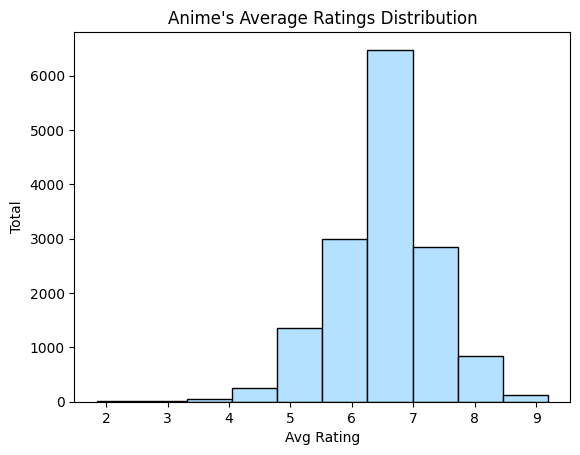

In [16]:
plt.hist(df.Score, color='#B4E1FF', edgecolor='black')
plt.ylabel('Total')
plt.xlabel('Avg Rating')
plt.title("Anime's Average Ratings Distribution")
plt.show()

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
anime_id,14952.0,19017.432718,14588.758618,1.00,4602.50,16729.00,33513.25,48492.00
Score,14952.0,6.511526,0.807185,1.85,6.08,6.51,7.01,9.19
Ranked,13231.0,6829.853828,4168.929475,1.00,3309.50,6618.00,9942.00,15780.00
Popularity,14952.0,7465.970907,4313.169381,1.00,3732.00,7466.50,11194.00,17565.00
Members,14952.0,40686.475321,134874.350809,200.00,736.00,3493.50,19193.25,2589552.00
Favorites,14952.0,537.629882,4399.016449,0.00,1.00,6.00,47.00,183914.00
Watching,14952.0,2619.806715,15190.098642,0.00,27.00,127.00,723.00,887333.00
Completed,14952.0,25943.096977,98127.291289,0.00,246.00,1515.50,9797.00,2182587.00
On-Hold,14952.0,1121.307986,4613.759597,0.00,14.00,78.00,388.25,187919.00
Dropped,14952.0,1377.861891,5110.874501,0.00,48.00,102.00,377.00,174710.00


In [18]:
df.sort_values(by='Members', ascending=False).head()

,anime_id,Name,Score,Genres,English name,Japanese name,sypnopsis,Type,Episodes,Aired,...,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped
1393,1535,Death Note,8.63,"Mystery, Police, Psychological, Supernatural, ...",Death Note,デスノート,"shinigami, as a god of death, can kill any per...",TV,37,"Oct 4, 2006 to Jun 27, 2007",...,23 min. per ep.,R - 17+ (violence & profanity),60.0,1,2589552,145201,122401,2146116,75054,80834
7420,16498,Shingeki no Kyojin,8.48,"Action, Military, Mystery, Super Power, Drama,...",Attack on Titan,進撃の巨人,"Centuries ago, mankind was slaughtered to near...",TV,25,"Apr 7, 2013 to Sep 29, 2013",...,24 min. per ep.,R - 17+ (violence & profanity),115.0,2,2531397,129844,140753,2182587,37345,44635
3971,5114,Fullmetal Alchemist: Brotherhood,9.19,"Action, Military, Adventure, Comedy, Drama, Ma...",Fullmetal Alchemist:Brotherhood,鋼の錬金術師 FULLMETAL ALCHEMIST,"""In order for something to be obtained, someth...",TV,64,"Apr 5, 2009 to Jul 4, 2010",...,24 min. per ep.,R - 17+ (violence & profanity),1.0,3,2248456,183914,171871,1644938,75728,32456
6593,11757,Sword Art Online,7.25,"Action, Game, Adventure, Romance, Fantasy",Sword Art Online,ソードアート・オンライン,"In the year 2022, virtual reality has progress...",TV,25,"Jul 8, 2012 to Dec 23, 2012",...,23 min. per ep.,PG-13 - Teens 13 or older,2584.0,4,2214395,66342,80304,1907261,25632,90661
9960,30276,One Punch Man,8.57,"Action, Sci-Fi, Comedy, Parody, Super Power, S...",One Punch Man,ワンパンマン,The seemingly ordinary and unimpressive Saitam...,TV,12,"Oct 5, 2015 to Dec 21, 2015",...,24 min. per ep.,R - 17+ (violence & profanity),81.0,5,2123866,54435,96568,1841220,30271,26755


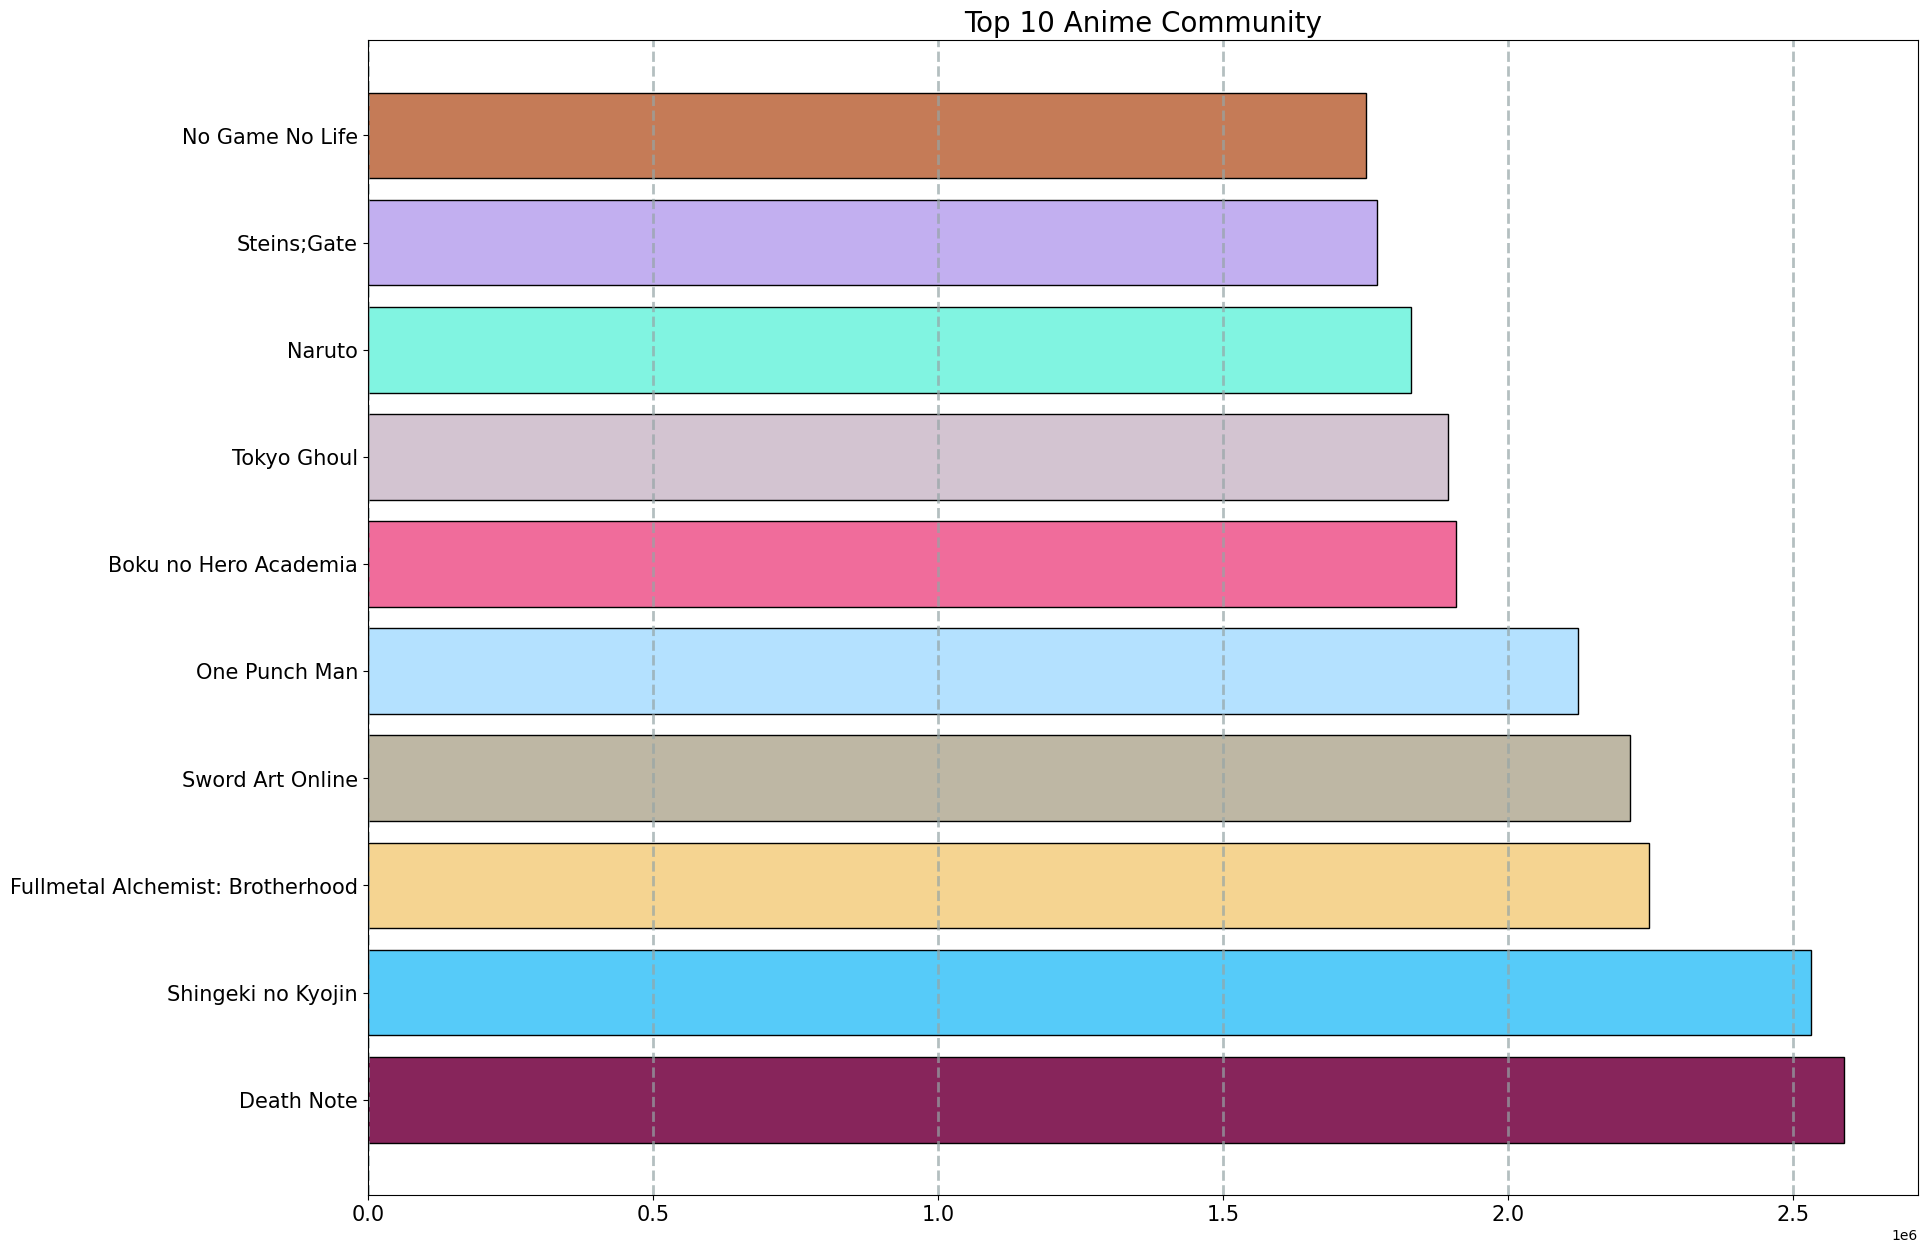

In [19]:
plt.figure(figsize = (20,15))
top10_anime = df[['Name', 'Members']].sort_values(by = 'Members',ascending = False).head(10)

colors = ['#87255B', '#56CBF9', '#F5D491', '#BEB7A4', '#B4E1FF', '#F06C9B', '#D3C4D1', '#81F4E1', '#C2AFF0', '#C57B57']


labels = top10_anime[['Name']].values.flatten()
values = top10_anime[['Members']].values.flatten()

plt.barh(labels, values, color = colors, edgecolor='black')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='x', alpha=0.7)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title("Top 10 Anime Community", fontdict = {'fontsize' : 20})
plt.show()

plt.show()

In [20]:
df.sort_values(by='Score', ascending=False).head()

,anime_id,Name,Score,Genres,English name,Japanese name,sypnopsis,Type,Episodes,Aired,...,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped
3971,5114,Fullmetal Alchemist: Brotherhood,9.19,"Action, Military, Adventure, Comedy, Drama, Ma...",Fullmetal Alchemist:Brotherhood,鋼の錬金術師 FULLMETAL ALCHEMIST,"""In order for something to be obtained, someth...",TV,64,"Apr 5, 2009 to Jul 4, 2010",...,24 min. per ep.,R - 17+ (violence & profanity),1.0,3,2248456,183914,171871,1644938,75728,32456
13935,40028,Shingeki no Kyojin: The Final Season,9.17,"Action, Military, Mystery, Super Power, Drama,...",Attack on Titan Final Season,進撃の巨人 The Final Season,Gabi Braun and Falco Grice have been training ...,TV,16,"Dec 7, 2020 to ?",...,23 min. per ep.,R - 17+ (violence & profanity),2.0,119,733260,44862,566239,553,6658,2090
5678,9253,Steins;Gate,9.11,"Thriller, Sci-Fi",Steins;Gate,STEINS;GATE,The self-proclaimed mad scientist Rintarou Oka...,TV,24,"Apr 6, 2011 to Sep 14, 2011",...,24 min. per ep.,PG-13 - Teens 13 or older,3.0,9,1771162,148452,114349,1134756,60926,35600
13364,38524,Shingeki no Kyojin Season 3 Part 2,9.10,"Action, Drama, Fantasy, Military, Mystery, Sho...",Attack on Titan Season 3 Part 2,進撃の巨人 Season3 Part.2,Seeking to restore humanity's diminishing hope...,TV,10,"Apr 29, 2019 to Jul 1, 2019",...,23 min. per ep.,R - 17+ (violence & profanity),4.0,63,1073626,40985,54607,906824,5533,3099
6457,11061,Hunter x Hunter (2011),9.10,"Action, Adventure, Fantasy, Shounen, Super Power",Hunter x Hunter,HUNTER×HUNTER（ハンター×ハンター）,Hunter x Hunter is set in a world where Hunter...,TV,148,"Oct 2, 2011 to Sep 24, 2014",...,23 min. per ep.,PG-13 - Teens 13 or older,6.0,12,1673924,147274,227277,1094486,79587,31652


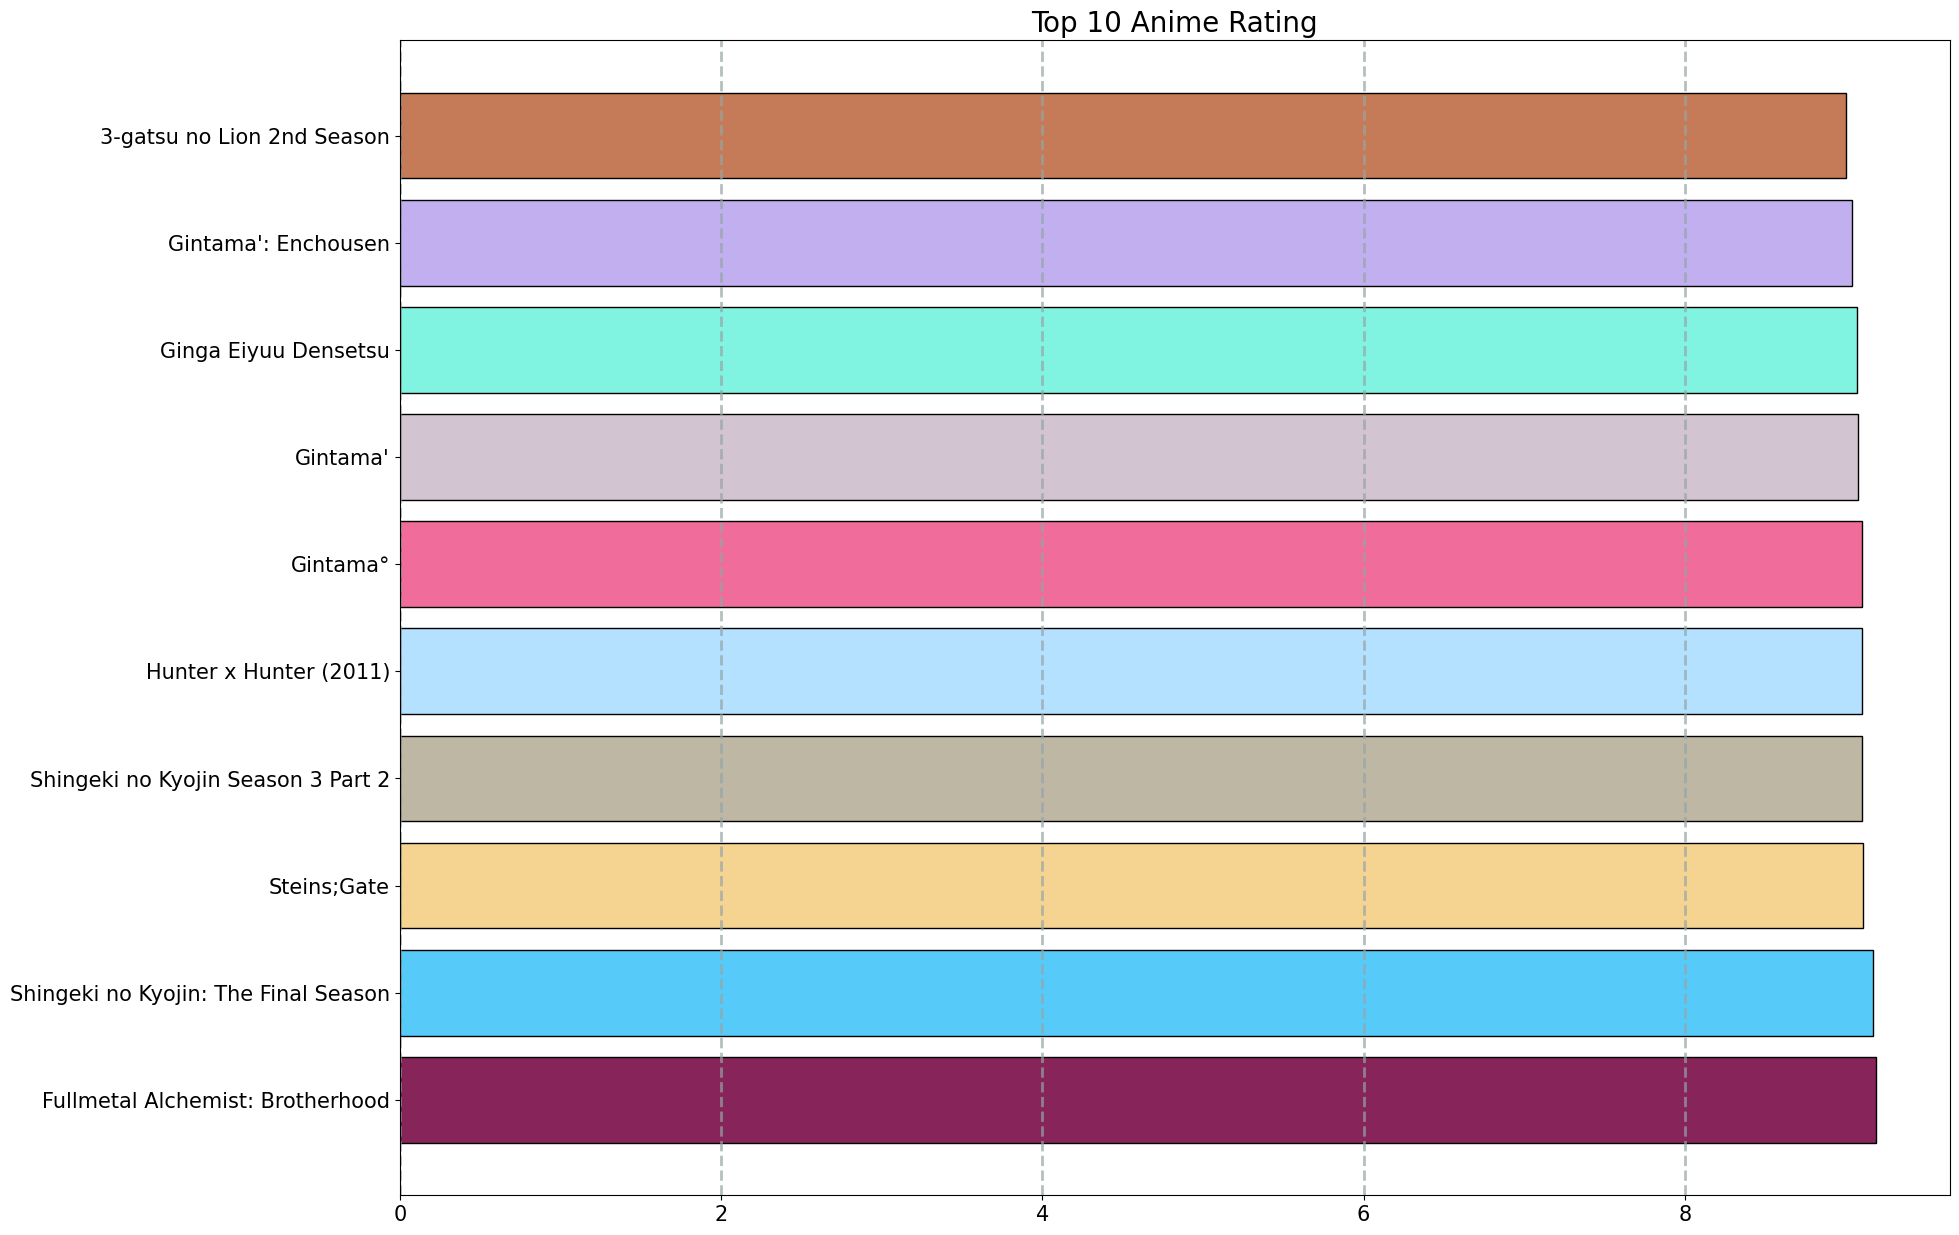

In [21]:
plt.figure(figsize = (20,15))
top10_anime = df[['Name', 'Score']].sort_values(by = 'Score',ascending = False).head(10)

colors = ['#87255B', '#56CBF9', '#F5D491', '#BEB7A4', '#B4E1FF', '#F06C9B', '#D3C4D1', '#81F4E1', '#C2AFF0', '#C57B57']


labels = top10_anime[['Name']].values.flatten()
values = top10_anime[['Score']].values.flatten()

plt.barh(labels, values, color = colors, edgecolor='black')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='x', alpha=0.7)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title("Top 10 Anime Rating", fontdict = {'fontsize' : 20})
plt.show()

plt.show()

## Data Preparation

In [22]:
import re

def text_cleaning(text):
  text = re.sub(r"[^\w\s]", "", text)
  text = re.sub(r"https?://[^\s]+", "", text)
  return text

df['Name'] = df['Name'].apply(text_cleaning)


Menghapus tanda baca alfanumerik dan Hapus link (URL)

In [23]:
df

,anime_id,Name,Score,Genres,English name,Japanese name,sypnopsis,Type,Episodes,Aired,...,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,"In the year 2071, humanity has colonized sever...",TV,26,"Apr 3, 1998 to Apr 24, 1999",...,24 min. per ep.,R - 17+ (violence & profanity),28.0,39,1251960,61971,105808,718161,71513,26678
1,5,Cowboy Bebop Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,"other day, another bounty—such is the life of ...",Movie,1,"Sep 1, 2001",...,1 hr. 55 min.,R - 17+ (violence & profanity),159.0,518,273145,1174,4143,208333,1935,770
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,"Vash the Stampede is the man with a $$60,000,0...",TV,26,"Apr 1, 1998 to Sep 30, 1998",...,24 min. per ep.,PG-13 - Teens 13 or older,266.0,201,558913,12944,29113,343492,25465,13925
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),ches are individuals with special powers like ...,TV,26,"Jul 2, 2002 to Dec 24, 2002",...,25 min. per ep.,PG-13 - Teens 13 or older,2481.0,1467,94683,587,4300,46165,5121,5378
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,It is the dark century and the people are suff...,TV,52,"Sep 30, 2004 to Sep 29, 2005",...,23 min. per ep.,PG - Children,3710.0,4369,13224,18,642,7314,766,1108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14947,48481,Daomu Biji Zhi Qinling Shen Shu,6.51,"Adventure, Mystery, Supernatural",Unknown,盗墓笔记之秦岭神树,No synopsis information has been added to this...,ONA,Unknown,"Apr 4, 2021 to ?",...,Unknown,Unknown,NaN,13116,354,6,0,0,0,0
14948,48483,Mierukochan,6.51,"Comedy, Horror, Supernatural",Unknown,見える子ちゃん,ko is a typical high school student whose life...,TV,Unknown,2021 to ?,...,Unknown,Unknown,NaN,17562,7010,70,14,0,14,0
14949,48488,Higurashi no Naku Koro ni Sotsu,6.51,"Mystery, Dementia, Horror, Psychological, Supe...",Higurashi:When They Cry – SOTSU,ひぐらしのなく頃に卒,Sequel to Higurashi no Naku Koro ni Gou .,TV,Unknown,"Jul, 2021 to ?",...,Unknown,R - 17+ (violence & profanity),NaN,17558,11309,48,3,0,0,0
14950,48491,Yama no Susume Next Summit,6.51,"Adventure, Slice of Life, Comedy",Unknown,ヤマノススメ Next Summit,New Yama no Susume anime.,TV,Unknown,Unknown,...,Unknown,PG-13 - Teens 13 or older,NaN,17565,1386,2,13,2,2,1


In [24]:
df.duplicated().sum()

0

Tidak terdapat data duplikat

In [25]:
df.isnull().sum()

anime_id            0
Name                0
Score               0
Genres              0
English name        0
Japanese name       0
sypnopsis        1350
Type                0
Episodes            0
Aired               0
Premiered           0
Producers           0
Licensors           0
Studios             0
Source              0
Duration            0
Rating              0
Ranked           1721
Popularity          0
Members             0
Favorites           0
Watching            0
Completed           0
On-Hold             0
Dropped             0
dtype: int64

Terdapat *Missing value* pada kolom `sypnopsis dan Ranked`

In [26]:
df = df.dropna()

Menghapus data *Missing value*

In [27]:
df.isnull().sum()

anime_id         0
Name             0
Score            0
Genres           0
English name     0
Japanese name    0
sypnopsis        0
Type             0
Episodes         0
Aired            0
Premiered        0
Producers        0
Licensors        0
Studios          0
Source           0
Duration         0
Rating           0
Ranked           0
Popularity       0
Members          0
Favorites        0
Watching         0
Completed        0
On-Hold          0
Dropped          0
dtype: int64

In [28]:
print(f'Terdapat  {df.shape[0]} Table dan {df.shape[1]} columns.')

Terdapat  13229 Table dan 25 columns.


Yang awalnya jumlah dataset sebanyak `14952` dan dengan menghapus jumlah *missing value* dataset sekarang menjadi `13229`.

In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
anime_id,13229.0,18916.527478,14310.284710,1.00,4772.00,17113.00,33191.00,48456.00
Score,13229.0,6.549368,0.822849,1.85,6.12,6.51,7.08,9.19
Ranked,13229.0,6829.241364,4168.674693,1.00,3309.00,6614.00,9941.00,15780.00
Popularity,13229.0,7463.690906,4487.187134,1.00,3392.00,7517.00,11514.00,17500.00
Members,13229.0,45059.734523,142720.285794,200.00,641.00,3389.00,23222.00,2589552.00
Favorites,13229.0,601.686900,4672.643973,0.00,1.00,5.00,51.00,183914.00
Watching,13229.0,2908.379243,16125.259019,0.00,26.00,113.00,803.00,887333.00
Completed,13229.0,28973.528611,103921.255801,0.00,247.00,1561.00,12523.00,2182587.00
On-Hold,13229.0,1243.211505,4891.246416,0.00,14.00,71.00,459.00,187919.00
Dropped,13229.0,1534.773830,5412.823280,0.00,48.00,97.00,454.00,174710.00


Fungsi `describe()` memberikan informasi statistik pada masing-masing kolom, antara lain:

- `Count` adalah jumlah sampel pada data.
- `Mean` adalah nilai rata-rata.
- `Std` adalah standar deviasi.
- `Min` yaitu nilai minimum setiap kolom.
- `25%` adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama.
- `50%` adalah kuartil kedua, atau biasa juga disebut median (nilai tengah). - 75% adalah kuartil ketiga.
- `Max` adalah nilai maksimum.

## Model Development

In [30]:
df

,anime_id,Name,Score,Genres,English name,Japanese name,sypnopsis,Type,Episodes,Aired,...,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,"In the year 2071, humanity has colonized sever...",TV,26,"Apr 3, 1998 to Apr 24, 1999",...,24 min. per ep.,R - 17+ (violence & profanity),28.0,39,1251960,61971,105808,718161,71513,26678
1,5,Cowboy Bebop Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,"other day, another bounty—such is the life of ...",Movie,1,"Sep 1, 2001",...,1 hr. 55 min.,R - 17+ (violence & profanity),159.0,518,273145,1174,4143,208333,1935,770
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,"Vash the Stampede is the man with a $$60,000,0...",TV,26,"Apr 1, 1998 to Sep 30, 1998",...,24 min. per ep.,PG-13 - Teens 13 or older,266.0,201,558913,12944,29113,343492,25465,13925
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),ches are individuals with special powers like ...,TV,26,"Jul 2, 2002 to Dec 24, 2002",...,25 min. per ep.,PG-13 - Teens 13 or older,2481.0,1467,94683,587,4300,46165,5121,5378
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,It is the dark century and the people are suff...,TV,52,"Sep 30, 2004 to Sep 29, 2005",...,23 min. per ep.,PG - Children,3710.0,4369,13224,18,642,7314,766,1108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14916,47591,Kuro Gal ni Natta kara Shinyuu to shitemita,6.51,"Romance, Shounen Ai",Unknown,黒ギャルになったから親友としてみた。,Shion and Rui are the dream team when it comes...,TV,Unknown,"Feb 11, 2021 to ?",...,4 min.,R+ - Mild Nudity,15231.0,7387,3636,90,768,3,79,35
14917,47614,Nu Wushen de Canzhuo Spring Festival Special,6.83,"Slice of Life, Comedy",Cooking with Valkyries Spring Festival Special,Unknown,No synopsis information has been added to this...,Special,1,"Feb 11, 2021",...,10 min.,PG - Children,4382.0,11973,540,8,51,168,18,2
14918,47616,Yakusoku no Neverland 2nd Season Michishirube,4.81,"Mystery, Psychological, Supernatural, Thriller...",The Promised Neverland Season 2 Episode 5.5,約束のネバーランド 特別編「道標」,cap of the first season of Yakusoku no Neverla...,Special,1,"Feb 12, 2021",...,23 min.,R - 17+ (violence & profanity),10760.0,4398,13070,90,1183,8196,119,202
14924,47795,Ai Zai Xi Yuan Qian 2nd Season,6.51,"Fantasy, Romance",Immemorial Love For You 2nd Season,爱在西元前 第二季,No synopsis information has been added to this...,ONA,16,"Feb 14, 2021 to ?",...,Unknown,Unknown,13254.0,12411,463,35,40,0,7,7


In [31]:
data = df.drop(columns=['anime_id',
                        'Episodes',
                        'English name',
                        'Japanese name',
                        'sypnopsis',
                        'Episodes',
                        'Aired',
                        'Premiered',
                        'Producers',
                        'Licensors',
                        'Source',
                        'Duration',
                        'Rating',
                        'Ranked',
                        'Popularity',
                        'Members',
                        'Favorites',
                        'Watching',
                        'Completed',
                        'On-Hold',
                        'Dropped'])

Mengahapus kolom yang tidak dibutuhkan pada model kali ini.

In [32]:
data

,Name,Score,Genres,Type,Studios
0,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,Sunrise
1,Cowboy Bebop Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Movie,Bones
2,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",TV,Madhouse
3,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",TV,Sunrise
4,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",TV,Toei Animation
...,...,...,...,...,...
14916,Kuro Gal ni Natta kara Shinyuu to shitemita,6.51,"Romance, Shounen Ai",TV,Irawias
14917,Nu Wushen de Canzhuo Spring Festival Special,6.83,"Slice of Life, Comedy",Special,Unknown
14918,Yakusoku no Neverland 2nd Season Michishirube,4.81,"Mystery, Psychological, Supernatural, Thriller...",Special,CloverWorks
14924,Ai Zai Xi Yuan Qian 2nd Season,6.51,"Fantasy, Romance",ONA,Unknown


### Model Content Based Filtering (dengan Filter Genres)

In [33]:
tfid = TfidfVectorizer()
tfid.fit(data['Genres'])

tfid.get_feature_names_out()

array(['action', 'adventure', 'ai', 'arts', 'cars', 'comedy', 'dementia',
       'demons', 'drama', 'ecchi', 'fantasy', 'fi', 'game', 'harem',
       'historical', 'horror', 'josei', 'kids', 'life', 'magic',
       'martial', 'mecha', 'military', 'music', 'mystery', 'of', 'parody',
       'police', 'power', 'psychological', 'romance', 'samurai', 'school',
       'sci', 'seinen', 'shoujo', 'shounen', 'slice', 'space', 'sports',
       'super', 'supernatural', 'thriller', 'unknown', 'vampire'],
      dtype=object)

In [34]:
tfidf_matrix = tfid.fit_transform(data['Genres'])


tfidf_matrix.shape

(13229, 45)

In [35]:
tfidf_matrix.todense()

matrix([[0.30417283, 0.34382085, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.29098327, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.33789893, 0.38194304, 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.60096513, 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

In [36]:
pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tfid.get_feature_names_out(),
    index=data.Genres
).sample(22, axis=1).sample(10, axis=0)

,drama,seinen,super,arts,action,martial,kids,vampire,thriller,parody,...,historical,space,adventure,power,music,fi,ecchi,sci,fantasy,police
Genres,,,,,,,,,,,,,,,,,,,,,
"Action, Drama, Fantasy, Mecha, Sci-Fi",0.406304,0.0,0.0,0.000000,0.336492,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.397357,0.0,0.397357,0.372203,0.0
"Harem, Comedy, Romance, School, Shounen",0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0
"Action, Comedy, Magic, Fantasy",0.000000,0.0,0.0,0.000000,0.433273,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.479254,0.0
"Action, Historical, Martial Arts, Samurai, Shounen",0.000000,0.0,0.0,0.463633,0.234990,0.463633,0.0,0.0,0.0,0.0,...,0.373552,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0
"Slice of Life, Comedy, Josei",0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0
"Slice of Life, Comedy, Shoujo",0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0
"Slice of Life, Comedy, Supernatural, Drama, Romance, School",0.333039,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0
Supernatural,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0
"Comedy, Sports, Drama, Shounen",0.465423,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0


Output `matriks tf-idf` di atas menunjukkan hubungan antara nama anime terhadap kategori yang dipilih. Matriks ini menunjukkan seberapa besar korelasi antara Anime terhadap kategori yang dipilih.

In [37]:
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1.        , 0.78399904, 0.73975208, ..., 0.        , 0.        ,
        0.10622903],
       [0.78399904, 1.        , 0.51589414, ..., 0.20976923, 0.        ,
        0.        ],
       [0.73975208, 0.51589414, 1.        , ..., 0.12878306, 0.        ,
        0.1180075 ],
       ...,
       [0.        , 0.20976923, 0.12878306, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.10622903, 0.        , 0.1180075 , ..., 0.        , 0.        ,
        1.        ]])

In [38]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=data['Name'], columns=data['Name'])
print('Shape:', cosine_sim_df.shape)

# Melihat similarity matrix pada setiap resto
cosine_sim_df.sample(5, axis=1).sample(5, axis=0)

Shape: (13229, 13229)


Name,Mahou no Makochan,Crystal Clear,Hitotsubu ni Kawaranu Ai wo Komete,Koukaku Kidoutai Stand Alone Complex Solid State Society Uchikoma na Hibi,Sayonara Gokko
Name,,,,,
Majuu Sensen,0.286789,0.000000,0.0,0.000000,0.000000
Nanmu Ichibyousokusai,0.000000,0.402874,0.0,0.000000,0.385457
Galaxy Angel Rune,0.000000,0.000000,0.0,0.771030,0.000000
Guomin Laogong Dai Huijia 3rd Season,0.336291,0.000000,0.0,0.000000,0.000000
Crayon Shinchan Movie 21 Bakauma BKyuu Gourmet Survival Battle,0.000000,0.000000,0.0,0.129055,0.000000


In [39]:
def anime_recommendations(anime_name, similarity_data=cosine_sim_df, items=data[['Name','Genres']], k=5):


    index = similarity_data.loc[:,anime_name].to_numpy().argpartition(
        range(-1, -k, -1))


    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    closest = closest.drop(anime_name, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

In [40]:
data[data.Name.eq('One Piece')]

,Name,Score,Genres,Type,Studios
11,One Piece,8.52,"Action, Adventure, Comedy, Super Power, Drama,...",TV,Toei Animation


In [41]:
anime_recommendations('One Piece')

,Name,Genres
0,One Piece Episode of Sorajima,"Action, Adventure, Comedy, Super Power, Drama,..."
1,One Piece Episode of Merry Mou Hitori no Naka...,"Action, Adventure, Comedy, Drama, Fantasy, Sho..."
2,One Piece Movie 14 Stampede,"Action, Adventure, Comedy, Drama, Fantasy, Sho..."
3,One Piece Episode of East Blue Luffy to 4nin ...,"Action, Adventure, Comedy, Super Power, Drama,..."
4,One Piece Episode of Sabo 3 Kyoudai no Kizuna...,"Action, Adventure, Comedy, Super Power, Drama,..."


Sistem telah berhasil merekomendasikan top 5 persen anime yang mirip dengan *One Piece*, yaitu beberapa film dan seri dari *One Piece* itu sendiri. Jadi, jika pengguna menyukai *One Piece*, maka sistem dapat merekomendasikan seri atau movie *One Piece* lainnya.

### Model K-Nearest Neighbor

In [42]:
animedf_name = pd.DataFrame({'Name':data['Name']})
animedf_name.head()

,Name
0,Cowboy Bebop
1,Cowboy Bebop Tengoku no Tobira
2,Trigun
3,Witch Hunter Robin
4,Bouken Ou Beet


In [43]:
data.set_index('Name',inplace=True)

In [44]:
data_n = data[['Score','Type','Studios']]

In [45]:
data_new = pd.get_dummies(data_n[['Type','Studios']])
data_new = pd.concat([data_n, data_new], axis=1)
data_new = data_new.drop(columns='Type')
data_new = data_new.drop(columns='Studios')
data_new.head()

,Score,Type_Movie,Type_Music,Type_ONA,Type_OVA,Type_Special,Type_TV,Studios_10Gauge,"Studios_10Gauge, Studio DURIAN",Studios_2:10 AM Animation,...,"Studios_feel., Zexcs","Studios_feel., Zexcs, Assez Finaud Fabric",Studios_helo.inc,Studios_iDRAGONS Creative Studio,"Studios_ixtl, LIDENFILMS",Studios_monofilmo,Studios_pH Studio,Studios_production doA,Studios_ufotable,"Studios_ufotable, feel., Studio Flag"
Name,,,,,,,,,,,,,,,,,,,,,
Cowboy Bebop,8.78,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Cowboy Bebop Tengoku no Tobira,8.39,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Trigun,8.24,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Witch Hunter Robin,7.27,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bouken Ou Beet,6.98,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
model = NearestNeighbors(metric='euclidean')
model.fit(data_new)

NearestNeighbors(metric='euclidean')

In [47]:
def Recommended_model(anime_name:str, recommend_anime:int=5):
  print(f'Apabila pengguna menyukai aplikasi:{anime_name[0]} \nBerikut ini adalah aplikasi yang juga mungkin akan disukai :')
  distances, neighbors = model.kneighbors(data_new.loc[anime_name],n_neighbors=recommend_anime)
  similar_anime = []
  for anime_name in animedf_name.loc[neighbors[0][:]].values:
    similar_anime.append(anime_name[0])
  similar_distance = []
  for distance in distances[0]:
    similar_distance.append(f"{round(100-distance, 2)}%")
  return pd.DataFrame(data = {"Anime Name" : similar_anime, "Similiarity Score" : similar_distance})


In [48]:
Recommended_model(animedf_name.loc[21])

Apabila pengguna menyukai aplikasi:Neon Genesis Evangelion Death  Rebirth 
Berikut ini adalah aplikasi yang juga mungkin akan disukai :


,Anime Name,Similiarity Score
0,Neon Genesis Evangelion Death Rebirth,100.0%
1,Neon Genesis Evangelion The End of Evangelion,98.94%
2,Kekkaishi TV,98.59%
3,Doraemon Doraemon Comes Back,98.59%
4,Dr Slump Aralechan,98.59%


## Evaluation

### Calinski-Harabasz score

_**Calinski-Harabasz score**_ adalah metrik evaluasi untuk algoritme pengelompokan yang mengukur seberapa baik pengelompokan memisahkan data ke dalam kelompok-kelompok yang kompak dan terpisah. Didefinisikan sebagai rasio antara sebaran dalam cluster dan sebaran antar cluster, semakin tinggi nilai CH, semakin baik kinerja pengelompokan tersebut, tanpa memerlukan informasi tentang label kebenaran dasar.






Rumus  Calinski-Harabasz Score (CH) adalah:

$$CH = \frac{B}{W} \times \frac{N - k}{k - 1}$$

Di mana:
- \( B \) adalah sebaran antar cluster (between-cluster scatter).
- \( W \) adalah sebaran dalam cluster (within-cluster scatter).
- \( N \) adalah jumlah total data.
- \( k \) adalah jumlah cluster.

In [49]:
ch_score = calinski_harabasz_score(data_new, animedf_name)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [50]:
ch_score

3.1613291729405617

Hasil evaluasi menunjukkan bahwa kluster dalam model ini masih belum terpisahkan dengan baik, yang tercermin dari nilai skor Calinski-Harabasz (CH) yang relatif rendah sebesar `3.1613291729405617`. Kondisi ini mengindikasikan adanya potensi untuk rekomendasi yang kurang sesuai pada beberapa aplikasi, yang mungkin tidak sepenuhnya sesuai dengan preferensi pengguna. Oleh karena itu, perlu dilakukan peninjauan lebih lanjut atau penyesuaian pada model untuk meningkatkan pemisahan kluster dan akurasi rekomendasi.

### Davies Bouldin Score

 _**Davies Bouldin Score (DB)**_ adalah metrik evaluasi kinerja pengelompokan yang mengukur rata-rata kesamaan setiap cluster dengan cluster yang paling mirip dengan membandingkan jarak dalam cluster terhadap jarak antar cluster. Dengan skor minimum nol, semakin rendah nilai DB, semakin baik kinerja pengelompokannya, menunjukkan cluster yang lebih dekat satu sama lain dan kurang tersebar. Berbeda dari sebagian besar metrik, DB tidak memerlukan pengetahuan apriori tentang label kebenaran dasar, mirip dengan Silhouette Score, namun memiliki formulasi yang lebih sederhana, memberikan cara efisien untuk mengevaluasi pengelompokan tanpa memerlukan pengetahuan tambahan tentang struktur data.

Rumus Davies-Bouldin Score (DB) adalah:


$$ DB = \frac{1}{k} \sum_{i=1}^{k} \max_{j \neq i} \left( \frac{R_i + R_j}{d(c_i, c_j)} \right) $$


Di mana:
- \( k \) adalah jumlah cluster.
- \( R_i \) adalah radius dalam cluster ke-i.
- \( d(c_i, c_j) \) adalah jarak antara pusat cluster ke-i (\( c_i \)) dan pusat cluster ke-j (\( c_j \)).


Davies-Bouldin didefinisikan sebagai rata-rata dari nilai-nilai R, di mana setiap nilai R adalah rasio antara jumlah dari radius dalam cluster (dalam pengertian jarak, misalnya Euclidean distance) dan jarak antara pusat cluster, dengan pusat-pusat yang lain. Rasio ini digunakan untuk mengevaluasi kemiripan setiap cluster dengan cluster lain.

In [51]:
db_score = davies_bouldin_score(data_new, animedf_name)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [52]:
db_score

0.7864266764751376

Hasil evaluasi Davies-Bouldin (DB) menunjukkan bahwa model ini memiliki skor yang relatif cukup kecil, dengan nilai DB sebesar `0.7864266764751376` Hal ini menandakan bahwa model sudah memiliki separasi kluster yang cukup baik. Sebagai hasilnya, rekomendasi anime memiliki kualitas yang baik, mempertimbangkan bahwa pengelompokan kluster dalam model sudah cukup efektif dalam memisahkan data. Hal ini terbukti dengan hasil rekomendasi aplikasi yang sudah cukup baik.